# Tomar decisiones de negocio basadas en datos 

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.
Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

**Descripción de los datos** 

La tabla hypotheses_us.csv  contiene las siguientes tablas:

 - Hypotheses: breves descripciones de las hipótesis
 - Reach: alcance del usuario, en una escala del uno a diez
 - Impact: impacto en los usuarios, en una escala del uno al diez
 - Confidence: confianza en la hipótesis, en una escala del uno al diez
 - Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.


La tabla orders_us.csv contiene las siguientes columnas:

- transactionId: identificador de pedido
- visitorId: identificador del usuario que realizó el pedido
- date: fecha del pedido
- revenue: ingresos del pedido
- group: el grupo del test A/B al que pertenece el usuario

La tabla visits contiene las siguientes columnas :

- date: la fecha
- group: grupo del test A/B
- visits: el número de visitas en la fecha especificada para el grupo de test A/B especificado

Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#01.-Iniciacion" data-toc-modified-id="01.-Iniciacion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>01. Iniciacion</a></span></li><li><span><a href="#0.2-Exploracion-de-datos" data-toc-modified-id="0.2-Exploracion-de-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>0.2 Exploracion de datos</a></span><ul class="toc-item"><li><span><a href="#hypothesis" data-toc-modified-id="hypothesis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>hypothesis</code></a></span></li><li><span><a href="#orders" data-toc-modified-id="orders-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><code>orders</code></a></span></li><li><span><a href="#visits" data-toc-modified-id="visits-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><code>visits</code></a></span></li></ul></li><li><span><a href="#0.3-Preparacion-de-los-datos" data-toc-modified-id="0.3-Preparacion-de-los-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>0.3 Preparacion de los datos</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Conclusion-General" data-toc-modified-id="Conclusion-General-3.0.0.1"><span class="toc-item-num">3.0.0.1&nbsp;&nbsp;</span><strong>Conclusion General</strong></a></span></li></ul></li></ul></li></ul></li><li><span><a href="#04.--Priorizar-hipótesis" data-toc-modified-id="04.--Priorizar-hipótesis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>04.  Priorizar hipótesis</a></span><ul class="toc-item"><li><span><a href="#Aplicar-el-framework-ICE-para-priorizar-hipótesis." data-toc-modified-id="Aplicar-el-framework-ICE-para-priorizar-hipótesis.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Aplicar el framework ICE para priorizar hipótesis.</a></span></li><li><span><a href="#Aplicar-el-framework-RICE-para-priorizar-hipótesis" data-toc-modified-id="Aplicar-el-framework-RICE-para-priorizar-hipótesis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Aplicar el framework RICE para priorizar hipótesis</a></span></li><li><span><a href="#Mostrar-cómo-cambia-la-priorización-de-hipótesis-cuando-utilizas-RICE-en-lugar-de-ICE." data-toc-modified-id="Mostrar-cómo-cambia-la-priorización-de-hipótesis-cuando-utilizas-RICE-en-lugar-de-ICE.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE.</a></span></li><li><span><a href="#Conclusion-General" data-toc-modified-id="Conclusion-General-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Conclusion General</a></span></li></ul></li><li><span><a href="#0.5-Análisis-de-test-A/B" data-toc-modified-id="0.5-Análisis-de-test-A/B-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>0.5 Análisis de test A/B</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Representa-gráficamente-el-ingreso-acumulado-por-grupo.-Haz-conclusiones-y-conjeturas." data-toc-modified-id="1.-Representa-gráficamente-el-ingreso-acumulado-por-grupo.-Haz-conclusiones-y-conjeturas.-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-general" data-toc-modified-id="Conclusion-general-5.0.1.1"><span class="toc-item-num">5.0.1.1&nbsp;&nbsp;</span><strong>Conclusion general</strong></a></span></li></ul></li><li><span><a href="#2.-Representa-gráficamente-el-tamaño-de-pedido-promedio-acumulado-por-grupo.-Haz-conclusiones-y-conjeturas." data-toc-modified-id="2.-Representa-gráficamente-el-tamaño-de-pedido-promedio-acumulado-por-grupo.-Haz-conclusiones-y-conjeturas.-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-general" data-toc-modified-id="Conclusion-general-5.0.2.1"><span class="toc-item-num">5.0.2.1&nbsp;&nbsp;</span><strong>Conclusion general</strong></a></span></li></ul></li><li><span><a href="#3.-Representa-gráficamente-la-diferencia-relativa-en-el-tamaño-de-pedido-promedio-acumulado-para-el-grupo-B-en-comparación-con-el-grupo-A." data-toc-modified-id="3.-Representa-gráficamente-la-diferencia-relativa-en-el-tamaño-de-pedido-promedio-acumulado-para-el-grupo-B-en-comparación-con-el-grupo-A.-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-general" data-toc-modified-id="Conclusion-general-5.0.3.1"><span class="toc-item-num">5.0.3.1&nbsp;&nbsp;</span><strong>Conclusion general</strong></a></span></li></ul></li><li><span><a href="#4.-Calcula-la-tasa-de-conversión-de-cada-grupo-como-la-relación-entre-los-pedidos-y-el-número-de-visitas-de-cada-día" data-toc-modified-id="4.-Calcula-la-tasa-de-conversión-de-cada-grupo-como-la-relación-entre-los-pedidos-y-el-número-de-visitas-de-cada-día-5.0.4"><span class="toc-item-num">5.0.4&nbsp;&nbsp;</span>4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día</a></span><ul class="toc-item"><li><span><a href="#Conclusion-General" data-toc-modified-id="Conclusion-General-5.0.4.1"><span class="toc-item-num">5.0.4.1&nbsp;&nbsp;</span><strong>Conclusion General</strong></a></span></li></ul></li><li><span><a href="#5.-Traza-un-gráfico-de-dispersión-del-número-de-pedidos-por-usuario.-Haz-conclusiones-y-conjeturas." data-toc-modified-id="5.-Traza-un-gráfico-de-dispersión-del-número-de-pedidos-por-usuario.-Haz-conclusiones-y-conjeturas.-5.0.5"><span class="toc-item-num">5.0.5&nbsp;&nbsp;</span>5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-General" data-toc-modified-id="Conclusion-General-5.0.5.1"><span class="toc-item-num">5.0.5.1&nbsp;&nbsp;</span><strong>Conclusion General</strong></a></span></li></ul></li><li><span><a href="#6.-Calcula-los-percentiles-95-y-99-para-el-número-de-pedidos-por-usuario.-Define-el-punto-en-el-cual-un-punto-de-datos-se-convierte-en-una-anomalía." data-toc-modified-id="6.-Calcula-los-percentiles-95-y-99-para-el-número-de-pedidos-por-usuario.-Define-el-punto-en-el-cual-un-punto-de-datos-se-convierte-en-una-anomalía.-5.0.6"><span class="toc-item-num">5.0.6&nbsp;&nbsp;</span>6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-General" data-toc-modified-id="Conclusion-General-5.0.6.1"><span class="toc-item-num">5.0.6.1&nbsp;&nbsp;</span><strong>Conclusion General</strong></a></span></li></ul></li><li><span><a href="#7.-Traza-un-gráfico-de-dispersión-de-los-precios-de-los-pedidos." data-toc-modified-id="7.-Traza-un-gráfico-de-dispersión-de-los-precios-de-los-pedidos.-5.0.7"><span class="toc-item-num">5.0.7&nbsp;&nbsp;</span>7. Traza un gráfico de dispersión de los precios de los pedidos.</a></span></li><li><span><a href="#8.-Calcula-los-percentiles-95-y-99-de-los-precios-de-los-pedidos.-Define-el-punto-en-el-cual-un-punto-de-datos-se-convierte-en-una-anomalía." data-toc-modified-id="8.-Calcula-los-percentiles-95-y-99-de-los-precios-de-los-pedidos.-Define-el-punto-en-el-cual-un-punto-de-datos-se-convierte-en-una-anomalía.-5.0.8"><span class="toc-item-num">5.0.8&nbsp;&nbsp;</span>8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-General" data-toc-modified-id="Conclusion-General-5.0.8.1"><span class="toc-item-num">5.0.8.1&nbsp;&nbsp;</span><strong>Conclusion General</strong></a></span></li></ul></li><li><span><a href="#9.-Encuentra-la-significancia-estadística-de-la-diferencia-en-la-conversión-entre-los-grupos-utilizando-los-datos-en-bruto.-Haz-conclusiones-y-conjeturas." data-toc-modified-id="9.-Encuentra-la-significancia-estadística-de-la-diferencia-en-la-conversión-entre-los-grupos-utilizando-los-datos-en-bruto.-Haz-conclusiones-y-conjeturas.-5.0.9"><span class="toc-item-num">5.0.9&nbsp;&nbsp;</span>9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.</a></span></li><li><span><a href="#Conclusion-General" data-toc-modified-id="Conclusion-General-5.0.10"><span class="toc-item-num">5.0.10&nbsp;&nbsp;</span><strong>Conclusion General</strong></a></span></li><li><span><a href="#10.-Encuentra-la-significancia-estadística-de-la-diferencia-en-el-tamaño-promedio-de-pedido-entre-los-grupos-utilizando-los-datos-en-bruto.-Haz-conclusiones-y-conjeturas." data-toc-modified-id="10.-Encuentra-la-significancia-estadística-de-la-diferencia-en-el-tamaño-promedio-de-pedido-entre-los-grupos-utilizando-los-datos-en-bruto.-Haz-conclusiones-y-conjeturas.-5.0.11"><span class="toc-item-num">5.0.11&nbsp;&nbsp;</span>10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-General" data-toc-modified-id="Conclusion-General-5.0.11.1"><span class="toc-item-num">5.0.11.1&nbsp;&nbsp;</span><strong>Conclusion General</strong></a></span></li></ul></li><li><span><a href="#11.-Encuentra-la-significancia-estadística-de-la-diferencia-en-la-conversión-entre-los-grupos-utilizando-los-datos-filtrados.-Haz-conclusiones-y-conjeturas." data-toc-modified-id="11.-Encuentra-la-significancia-estadística-de-la-diferencia-en-la-conversión-entre-los-grupos-utilizando-los-datos-filtrados.-Haz-conclusiones-y-conjeturas.-5.0.12"><span class="toc-item-num">5.0.12&nbsp;&nbsp;</span>11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-General" data-toc-modified-id="Conclusion-General-5.0.12.1"><span class="toc-item-num">5.0.12.1&nbsp;&nbsp;</span><strong>Conclusion General</strong></a></span></li></ul></li><li><span><a href="#12.-Encuentra-la-significancia-estadística-de-la-diferencia-en-el-tamaño-promedio-de-pedido-entre-los-grupos-utilizando-los-datos-filtrados.-Haz-conclusiones-y-conjeturas." data-toc-modified-id="12.-Encuentra-la-significancia-estadística-de-la-diferencia-en-el-tamaño-promedio-de-pedido-entre-los-grupos-utilizando-los-datos-filtrados.-Haz-conclusiones-y-conjeturas.-5.0.13"><span class="toc-item-num">5.0.13&nbsp;&nbsp;</span>12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-General" data-toc-modified-id="Conclusion-General-5.0.13.1"><span class="toc-item-num">5.0.13.1&nbsp;&nbsp;</span><strong>Conclusion General</strong></a></span></li></ul></li><li><span><a href="#13.-Toma-una-decisión-basada-en-los-resultados-de-la-prueba" data-toc-modified-id="13.-Toma-una-decisión-basada-en-los-resultados-de-la-prueba-5.0.14"><span class="toc-item-num">5.0.14&nbsp;&nbsp;</span>13. Toma una decisión basada en los resultados de la prueba</a></span></li></ul></li></ul></li></ul></div>

## 01. Iniciacion ## 

In [1]:
#Cargaremos las librerias 

import pandas as pd
import matplotlib.pyplot as plt #Creacion de graficos
import seaborn as sns  # Visualizacion de datos
import numpy as np  # Calculo matematico y estadistico 
from scipy.stats import ttest_ind  #  realiza una prueba t de dos muestras independientes. 
from scipy import stats 
from math import ceil as math
from scipy import stats as st

In [2]:
#Carga de datos

try: #anaconda
    hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')

    orders = pd.read_csv('orders_us.csv', sep=',', parse_dates=['date'])
    
    visits = pd.read_csv('visits_us.csv',parse_dates=['date'] )
    
except: #jupyter
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';' )
    
    orders = pd.read_csv('/datasets/orders_us.csv', sep=',',parse_dates=['date'])
    
    visits = pd.read_csv('/datasets/visits_us.csv', parse_dates=['date'],  )

In [3]:
# Carga de funciones establecidas

def data_info(df):
    print('Analisis de datos de la tabla')
    print('Filas y columnas: \n{}'.format(df.shape))
    print('*' * 50)
    print('Informacion general:')
    print(df.info())
    print('*' * 50)
    print('Primeras cinco columnas: \n{}'.format(df.head()))
    print('*' * 50)
    print('Detalles estadisticos: \n{}'.format(df.describe()))
    print('*' * 50)
    print('Cuantos duplicados hay?\n')
    print('Hay {} datos duplicados.'.format(df.duplicated().sum()))
    print('*' * 50)
    print('Valores ausentes ?')
    print(df.isna().sum(),'\n')
    print('Porcentaje de valores ausentes \n')
    print(df.isna().mean().reset_index())
    print('*' * 50)
    print('Distribucion de valores ausentes \n')
    print((df.isna()
 .sum()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'index' : 'Variables', 0: 'Missing'})
).T)

In [4]:
#Funcion que separa la fecha por dia mes y año

def get_date(df): 
    columns = df.columns.tolist()
    idx = [columns.index(x) for x in columns if 'date' in x][0]
    
    df[columns[idx]] = pd.to_datetime(df[columns[idx]])
    df['month'] = df[columns[idx]].dt.month_name()
    df['year'] = df[columns[idx]].dt.year

In [5]:
# Funcion para convertir todas las columnas y celdas a minuscula 


def convertir_a_minusculas(df):
    """
    Convierte todas las columnas de un DataFrame a minúsculas utilizando applymap y str.lower().
    También modifica los nombres de las columnas a minúsculas.
    
    Args:
    df (pandas.DataFrame): El DataFrame a convertir.
    
    Returns:
    pandas.DataFrame: El DataFrame con todas las columnas en minúsculas y con nombres de columna en minúsculas.
    """
    df = df.applymap(lambda s: s.lower() if type(s) == str else s)
    df.columns = df.columns.str.lower()
    return df

## 0.2 Exploracion de datos 

### `hypothesis`

In [6]:
data_info(hypotheses)

Analisis de datos de la tabla
Filas y columnas: 
(9, 5)
**************************************************
Informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
**************************************************
Primeras cinco columnas: 
                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   


In [7]:
hypotheses.head(100)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [8]:
# Con una funcion convertimos las columnas a minuscula 

hypotheses = convertir_a_minusculas(hypotheses)

**Conclusion General**

De los datos podemos concluir lo siguiente:
- No hay valores duplicados
- No hay valores ausentes
- Los nombres de las columnas estan correctas pero se modificaron a minuscula

### `orders`

In [9]:
data_info(orders)

Analisis de datos de la tabla
Filas y columnas: 
(1197, 5)
**************************************************
Informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None
**************************************************
Primeras cinco columnas: 
   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


**Conclusion General**

De los datos podemos concluir lo siguiente:
- No hay valores duplicados
- Los nombres de las columnas estan correctas
- Se modifico el formato de la columna  dt por "datetime"

### `visits`

In [11]:
data_info(visits)

Analisis de datos de la tabla
Filas y columnas: 
(62, 3)
**************************************************
Informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None
**************************************************
Primeras cinco columnas: 
        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756
**************************************************
Detalles estadisticos: 
           visits
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000

In [12]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Conclusion General**

De los datos podemos concluir lo siguiente:
- No hay valores duplicados
- No hay valores ausentes
- Los nombres de las columnas estan correctas
-  Se modifico el formato de la columna  dt por "datetime"

## 0.3 Preparacion de los datos

Vamos a revisar si en la base existen usuarios que se encuetran en ambos grupos

In [13]:
# Usuarios que se encuentran en ambos grupos 

visitors_in_2groups = orders[orders.groupby('visitorId' )['group'].transform('nunique') > 1]

print(visitors_in_2groups)

      transactionId   visitorId       date  revenue group
2        2961555356  4069496402 2019-08-15     10.2     A
20       2904772834   963407295 2019-08-15      5.6     B
23       4252514150   351125977 2019-08-15    235.6     B
24       1162046357  3234906277 2019-08-15    120.2     B
26       2223239646   199603092 2019-08-15     55.7     A
...             ...         ...        ...      ...   ...
1182     2682156369  1668030113 2019-08-14     20.8     B
1183     1458356232   963407295 2019-08-14     80.0     A
1184     1329499668  2949041841 2019-08-14    160.7     B
1189     4082620617   393266494 2019-08-14    490.4     B
1195     1947021204  1614305549 2019-08-14      5.5     A

[181 rows x 5 columns]


In [14]:
unique_visitors_in_2groups = visitors_in_2groups['visitorId'].nunique()

print("Cantidad de usuarios únicos que se encuentran en ambos grupos:", unique_visitors_in_2groups)



Cantidad de usuarios únicos que se encuentran en ambos grupos: 58


In [15]:

# Crear el nuevo DataFrame orders_new excluyendo los usuarios en visitor_in_2group
orders = orders[~orders["visitorId"].isin(visitors_in_2groups["visitorId"])].copy()




##### **Conclusion General**

181 visitantes pertenecen tanto al grupo A como al grupo B. Se debe realizar una prueba A/B entre dos grupos independientes. Por lo tanto, filtramos a los visitantes que están en ambos grupos. De ellos 58 usuarios son unicos. 

## 04.  Priorizar hipótesis

 Con el metodo famework vamos a analizar las nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.
 
 la diferencia clave entre RICE e ICE radica en los criterios utilizados. RICE utiliza el alcance como un criterio adicional para evaluar la cantidad de usuarios afectados, mientras que ICE se centra en la facilidad de implementación del proyecto. Ambos métodos son enfoques útiles para la priorización y pueden adaptarse según las necesidades y preferencias del equipo o la organización.

### Aplicar el framework ICE para priorizar hipótesis.

In [16]:
# IMPACTO * Confianza / Esfuerzo`

hypotheses['ICE'] = (hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
display(hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))
   

,hypothesis,ICE
8,launch a promotion that gives users discounts ...,16.200000
0,add two new channels for attracting traffic. t...,13.333333
7,add a subscription form to all the main pages....,11.200000
6,show banners with current offers and sales on ...,8.000000
2,add product recommendation blocks to the store...,7.000000
1,launch your own delivery service. this will sh...,2.000000
5,add a customer review page. this will increase...,1.333333
3,change the category structure. this will incre...,1.125000
4,change the background color on the main page. ...,1.000000


Las hipotesis mas prometodoras son la 8 , 0 y 7 y la menor evaluada es la 4

### Aplicar el framework RICE para priorizar hipótesis

In [17]:

# ALCANCE * IMPACTO * CONFIANZA / ESFUERZO`

hypotheses['RICE'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

# Ordenar 

display(hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))


,hypothesis,RICE
7,add a subscription form to all the main pages....,112.0
2,add product recommendation blocks to the store...,56.0
0,add two new channels for attracting traffic. t...,40.0
6,show banners with current offers and sales on ...,40.0
8,launch a promotion that gives users discounts ...,16.2
3,change the category structure. this will incre...,9.0
1,launch your own delivery service. this will sh...,4.0
5,add a customer review page. this will increase...,4.0
4,change the background color on the main page. ...,3.0



Al aplicar el metodo rice se vio modificado el orden de las hipotesis, quedando de los primeros el  7,2 y 0 . por otr lado, la hipotesis 4 sigue siendo el menos prometedor. 

### Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. 

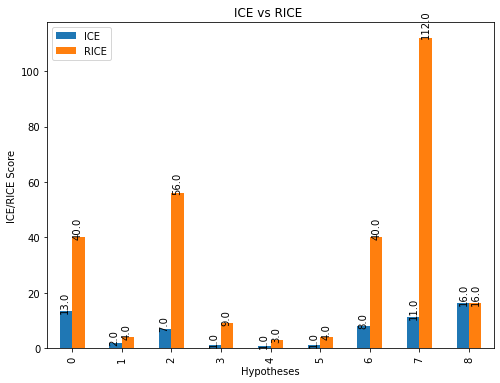

In [18]:
ax = hypotheses[['hypothesis','ICE','RICE']].plot(kind='bar',stacked=False, figsize=(8,6))

for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)
    
plt.title('ICE vs RICE ')
plt.xlabel('Hypotheses')
plt.ylabel('ICE/RICE Score')
plt.show()

### Conclusion General

RICE es un marco de trabajo para priorizar ideas y características de productos. La abreviatura incluye 4 factores que el gerente de productos puede utilizar de manera segura para evaluar y priorizar las características del producto:

Alcance: cobertura 

Impacto: impacto

Confianza: confianza en su evaluación de cobertura, impacto y esfuerzo.

Esfuerzo: costos laborales Calculamos 

`la puntuación ICE utilizando la siguiente fórmula: ICE = (Alcance) * (Confianza) * (Esfuerzo) / Impacto`

ICE es un marco de trabajo para seleccionar trabajos de características basado en 3 dimensiones clave, que permite a los equipos tomar mejores decisiones sobre qué características priorizar:

Impacto: ¿Cuánto cambiará esto nuestro negocio (si funciona)?

Confianza: ¿Cuán seguros estamos de que esto funcionará? 

Facilidad: ¿Cuánto trabajo implica implementarlo? Calculamos la puntuación ICE utilizando la siguiente fórmula:

`ICE = (Impacto) * (Confianza) * (Facilidad)`

La diferencia entre los marcos de trabajo ICE y RICE es el parámetro de alcance, que estima cuántos clientes se alcanzarán mediante encuestas. Este parámetro agrega otro factor al marco de trabajo, lo que hace que las puntuaciones RICE sean más altas que las puntuaciones ICE. Por lo tanto, el marco de trabajo RICE se verá afectado por el factor de alcance y la puntuación RICE se sesgará en consecuencia.

De acuerdo con el gráfico anterior, la hipótesis 7 tiene la puntuación más alta tanto en ICE como en RICE y debería ser priorizada. Las hipótesis 1, 3, 4 y 5 tienen una puntuación baja tanto en ICE como en RICE.

En ICE, la hipótesis 8 fue la más alta, pero ocupa el quinto lugar en las puntuaciones de RICE. La hipótesis 7 ocupaba el tercer lugar en ICE, pero tiene la puntuación más alta y el doble de la puntuación que la hipótesis 2. Las diferencias se deben a los valores de alcance de las hipótesis. Las hipótesis con un alcance, impacto y confianza más altos, y un esfuerzo comparativamente menor, tienen una puntuación RICE comparativamente más alta, por ejemplo, la hipótesis 7, que es la tercera más alta en ICE, pero pasó a ocupar el primer lugar en RICE debido a que su alcance es alto.

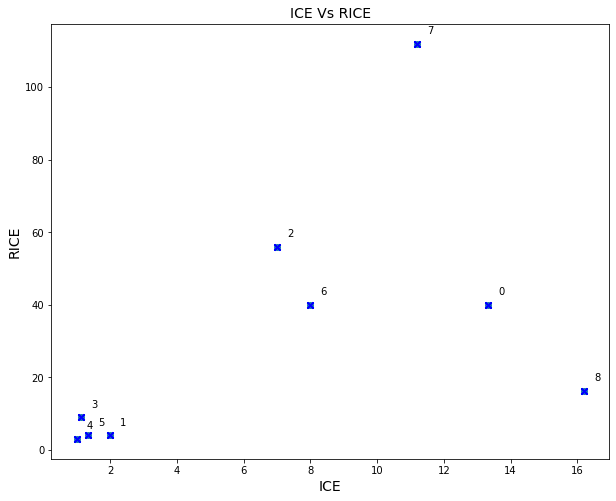

In [19]:
# Gradicar ICE Y RICE

x = hypotheses['ICE'].values
y = hypotheses['RICE'].values
types = hypotheses.index.values

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y)

ax.set_xlabel('ICE', fontsize=14)
ax.set_ylabel('RICE', fontsize=14)
ax.set_title('ICE Vs RICE', fontsize=14)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='blue')

Como se muestra en el grafico, la hipotesis más prometedora es la 7 , a pesar que el 8 era la más alta en el analisis de ICE, no lo es tanto para el RIC.

## 0.5 Análisis de test A/B

#### 1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [20]:
revenueGroup = orders[['date','group','visitorId']].copy()

# Se crea un DataFrame "datesGroups" con las columnas "date" y "group" de "orders" y se eliminan las filas duplicadas

revenueGroup = revenueGroup.drop_duplicates()
revenueGroup.head()

,date,group,visitorId
0,2019-08-15,B,3312258926
1,2019-08-15,B,3642806036
3,2019-08-15,B,1196621759
4,2019-08-15,B,2322279887
5,2019-08-15,B,935554773


In [21]:
# Se aplica una función lambda a "revenue" para filtrar los datos de "orders" que tengan fecha menor o igual a la fecha de cada fila en "datesGroups"

ordersAggregated = revenueGroup.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), 
                                      axis=1).sort_values(by=['date','group'])
print(ordersAggregated)

           date group  transactionId  visitorId  revenue
55   2019-08-01     A             23         19   2266.6
72   2019-08-01     A             23         19   2266.6
73   2019-08-01     A             23         19   2266.6
96   2019-08-01     A             23         19   2266.6
99   2019-08-01     A             23         19   2266.6
...         ...   ...            ...        ...      ...
1023 2019-08-31     B            548        528  79651.2
1024 2019-08-31     B            548        528  79651.2
1026 2019-08-31     B            548        528  79651.2
1037 2019-08-31     B            548        528  79651.2
1038 2019-08-31     B            548        528  79651.2

[1001 rows x 5 columns]


In [22]:

# Se aplica una función lambda a "revenue" para filtrar los datos de "orders" que tengan fecha menor o igual a la fecha de cada fila en "datesGroups"
visitorsAggregated = revenueGroup.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].
                                        agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
print(visitorsAggregated)

           date group  visits
55   2019-08-01     A     719
72   2019-08-01     A     719
73   2019-08-01     A     719
96   2019-08-01     A     719
99   2019-08-01     A     719
...         ...   ...     ...
1023 2019-08-31     B   18916
1024 2019-08-31     B   18916
1026 2019-08-31     B   18916
1037 2019-08-31     B   18916
1038 2019-08-31     B   18916

[1001 rows x 3 columns]


In [23]:

# Se fusionan los DataFrames  en un nuevo DataFrame "cumulativeData" uniendo los datos por fecha y grupo

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

# Ordenar 
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue','orders']]


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     A      23      19   2266.6       719
2 2019-08-01     A      23      19   2266.6       719
3 2019-08-01     A      23      19   2266.6       719
4 2019-08-01     A      23      19   2266.6       719


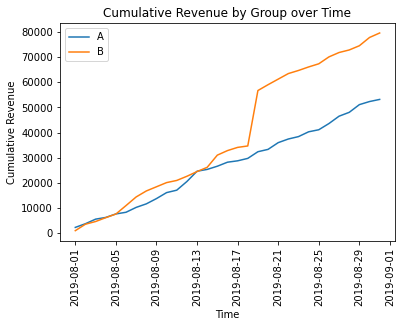

In [24]:
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.title('Cumulative Revenue by Group over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Revenue')
plt.xticks(rotation=90)
plt.show()

##### **Conclusion general** 

Según el gráfico anterior, los ingresos acumulados para ambos grupos aumentaron constantemente durante todo el experimento. Sin embargo, en 2019, el grupo B experimentó picos de ingresos en ciertos puntos que ocurrieron después del 17 de agosto. Los ingresos acumulados del grupo B aumentaron y continuaron aumentando de manera constante.

#### 2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

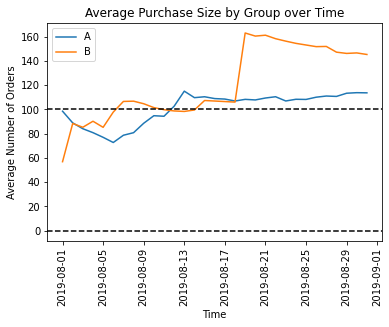

In [25]:
# graficaar el tamaño de pedido promedio acolumado 

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

#  Visualizacion

plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=100, color='black', linestyle='--')
plt.legend()
plt.title('Average Purchase Size by Group over Time')
plt.xlabel('Time')
plt.ylabel('Average Number of Orders')
plt.xticks(rotation=90)
plt.show()



##### **Conclusion general**

Basándonos en la gráfica anterior, ambos grupos tienen tamaños de pedido promedio fluctuantes. Después del 21 de agosto de 2019, ambas líneas se vuelven un poco más estables. Hay un gran aumento en el tamaño promedio del pedido para el Grupo B en un punto determinado, mientras que el grupo A disminuyó un poco al principio y luego se recuperó lentamente. Sin embargo, el tamaño promedio del pedido del Grupo B es mucho mayor que el del grupo A. El grupo A está bastante por debajo del grupo B.

#### 3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

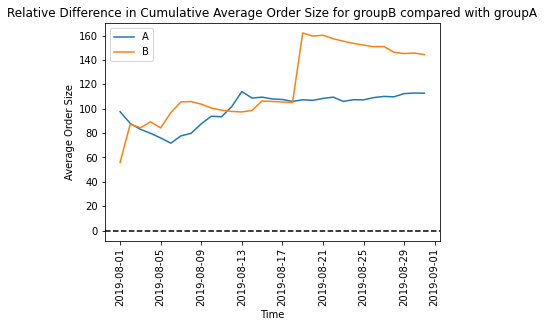

In [26]:
#  Recopilacion de datos en un DF
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# gráfico de diferencia relativa para los tamaños promedio de compra
plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'] -1, label='A')
plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'] -1, label='B')


# agregando el eje X
plt.axhline(y=0, color='black', linestyle='--') 
plt.legend()
plt.title('Relative Difference in Cumulative Average Order Size for groupB compared with groupA')
plt.xlabel('Time')
plt.ylabel('Average Order Size')
plt.xticks(rotation=90)
plt.show()

Basándonos en la gráfica anterior, el grupo B comenzó con un salto y entre el 17 de agosto de 2019 y el 21 de agosto de 2019, hubo un aumento repentino en el tamaño promedio de los pedidos, mientras que el grupo A cayó ligeramente durante unos meses y luego se recuperó lentamente. Hubo muchas fluctuaciones en ambos grupos, pero en comparación con el grupo B, el grupo A tiene un tamaño promedio de pedido mucho mejor.

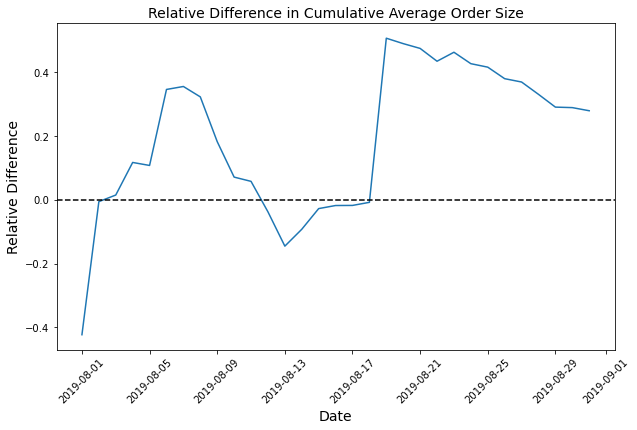

In [27]:
#Diferencia Relativa en el Tamaño Promedio Acumulativo del Pedido

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

ax.set_title("Relative Difference in Cumulative Average Order Size", fontdict={"size":14})
plt.xlabel("Date", fontdict={"size":14})
plt.ylabel("Relative Difference", fontdict={"size":14})
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

##### **Conclusion general**

En el gráfico anterior, observamos varias subidas y bajadas, es decir, la diferencia entre los segmentos aumenta desde menos de -0.4 hasta más de 0.5. Esto significa que debe haber algunos pedidos grandes y valores atípicos o compras anormalmente gr

#### 4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día

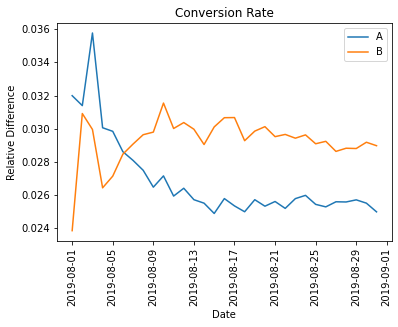

In [28]:


# Calculado la conversion acomulativa
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Seleccionar los datos del grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Seleccionar los datos del grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Graficar
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.title('Conversion Rate')
plt.xlabel('Date')
plt.ylabel('Relative Difference')
plt.xticks(rotation=90)
plt.show()



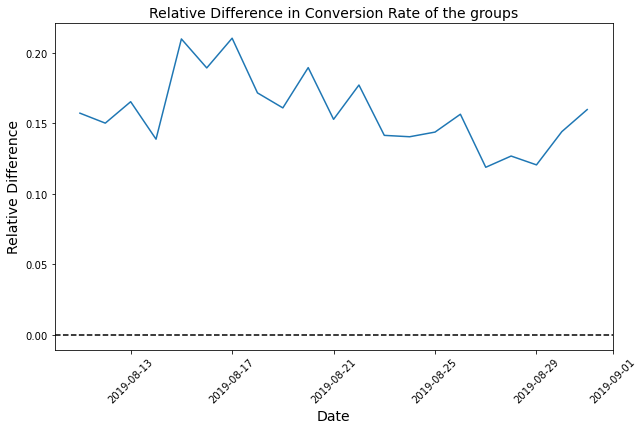

In [29]:

# Diferencia Relativa en la Tasa de Conversión de los grupos
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeConversions['conversionB'] = mergedCumulativeConversions.query('date > "2019-08-10"')['conversionB']
mergedCumulativeConversions['conversionA'] = mergedCumulativeConversions.query('date > "2019-08-10"')['conversionA']

fig, ax = plt.subplots()
fig.set_size_inches(10,6)


plt.plot(mergedCumulativeConversions['date'],(mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1))


ax.set_title("Relative Difference in Conversion Rate of the groups", fontdict={"size":14})
plt.xlabel("Date", fontdict={"size":14})
plt.ylabel("Relative Difference", fontdict={"size":14})
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()



##### **Conclusion General**

La diferencia relativa en la tasa de conversión no muestra grandes cambios o variaciones significativas después del 10 de agosto de 2019. Esto significa que a partir de esa fecha, la tasa de conversión entre los grupos se mantuvo relativamente estable.

Cuando se habla de una diferencia relativa en la tasa de conversión, se refiere a la variación porcentual en la cantidad de conversiones (por ejemplo, compras, registros, clics) entre los grupos comparados. Una diferencia relativa cercana a cero indica que ambos grupos tienen tasas de conversión similares, mientras que una diferencia relativa mayor indica una disparidad en las tasas de conversión entre los grupos.

En este caso, la diferencia relativa en la tasa de conversión fluctúa entre 0.15 y 0.20. Esto implica que hay una variación de alrededor del 15% al 20% en la tasa de conversión entre los grupos. Sin embargo, es importante tener en cuenta que esta diferencia se considera relativamente estable, ya que no muestra fluctuaciones drásticas o cambios significativos en el período analizado.

#### 5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [30]:
print(orders)

      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     30.4     B
1        2804400009  3642806036 2019-08-15     15.2     B
3        3797467345  1196621759 2019-08-15    155.1     B
4        2282983706  2322279887 2019-08-15     40.5     B
5         182168103   935554773 2019-08-15     35.0     B
...             ...         ...        ...      ...   ...
1191     3592955527   608641596 2019-08-14    255.7     B
1192     2662137336  3733762160 2019-08-14    100.8     B
1193     2203539145   370388673 2019-08-14     50.1     A
1194     1807773912   573423106 2019-08-14    165.3     A
1196     3936777065  2108080724 2019-08-15   3120.1     B

[1016 rows x 5 columns]


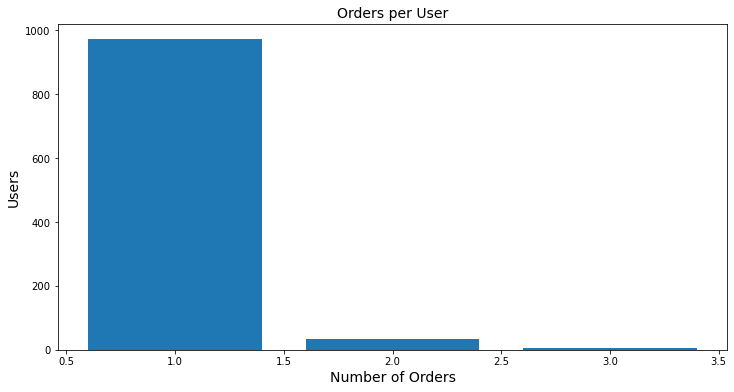

In [31]:


ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsers.columns = ['userId', 'no_of_orders']

# Eliminar cualquier duplicado
ordersByUsers = ordersByUsers.drop_duplicates()

# Ordenar los datos por el número de pedidos en orden descendente.

ordersByUsers = ordersByUsers.sort_values(by='no_of_orders', ascending=False)

#Graficar

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

# Utilizar el número de órdenes como las etiquetas del eje x
x_labels = ordersByUsers['no_of_orders']

# Cambiar la posición de los argumentos en `bar()` para intercambiar los ejes x e y
ax.bar(x_labels, range(len(ordersByUsers)))

# Ajustar el título y las etiquetas de los ejes para reflejar el cambio
ax.set_title("Orders per User", fontdict={"size": 14})
ax.set_xlabel("Number of Orders", fontdict={"size": 14})
ax.set_ylabel("Users", fontdict={"size": 14})

plt.show()


##### **Conclusion General**

Según la gráfica anterior, la mayoría de los usuarios realizan 1 o 2 pedidos. Muy pocos usuarios hacen más de 3 o 4 pedidos.

#### 6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [32]:
print(np.percentile(ordersByUsers['no_of_orders'], [95,99]))


[1. 2.]


##### **Conclusion General**

Según los cálculos de percentiles anteriores, el 95% de las observaciones se encuentran dentro de 1 pedido por usuario y el 99% de las observaciones se encuentran dentro de 2 pedidos por usuario. Por lo tanto, filtrar el número de pedidos que es mayor a 2 pedidos sería el punto en el que el valor de los datos se vuelve una anomalía.

#### 7. Traza un gráfico de dispersión de los precios de los pedidos. 

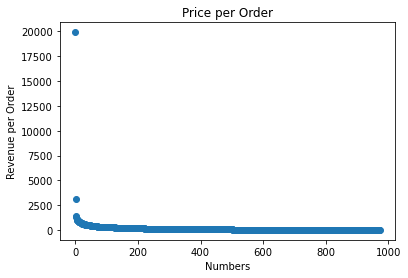

In [33]:
#print(visits)
# Agrupar los pedidos por usuarios

ordersByPrices= orders.groupby('visitorId', as_index=False).agg({'revenue':'sum'})
ordersByPrices.columns = ['userId', 'revenue']

ordersByPrices = ordersByPrices.drop_duplicates()

# ordenar los datos por número de pedidos en orden descendente
ordersByPrices = ordersByPrices.sort_values(by='revenue', ascending=False)

# encontrar los valores para el eje horizontal según el número de observaciones generadas
x_values = pd.Series(range(0, len(ordersByPrices)))

plt.scatter(x_values, ordersByPrices['revenue'])

plt.title('Price per Order')
plt.xlabel('Numbers')
plt.ylabel('Revenue per Order')
plt.show()

#### 8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [34]:
print(np.percentile(orders['revenue'], [ 95, 99]))

[414.275 830.3  ]


##### **Conclusion General**

Basándonos en los cálculos de percentiles anteriores, podemos concluir que el 95 % de las observaciones se encuentran dentro de los 414 dólares por pedido y el 99 % de las observaciones se encuentran dentro de los 860 dólares por pedido. Podemos definir el punto en el que el valor de los datos se convierte en una anomalía como cualquier observación en la que los ingresos sean superiores a los 450 dólares.

#### 9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [35]:
# calcular la significancia estadística de la diferencia en la tasa de conversión entre los grupos
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


sampleAFiltered = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p_value: {0:.3f}'.format(p_value))
print("Tasa de conversion relativa: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

# alpha is Significance level
alpha = 0.05

if p_value < alpha:
    print('Rechaza la hipótesis nula: existe una diferencia significativa entre la tasa de conversión de los grupos A y B.')
else:
    print('No se rechaza H0: no hay una diferencia significativa entre la tasa de conversión de los grupos A y B.')
    

p_value: 0.013
Tasa de conversion relativa: 0.155
Rechaza la hipótesis nula: existe una diferencia significativa entre la tasa de conversión de los grupos A y B.


#### **Conclusion General**

Probamos si hay una diferencia estadísticamente significativa en la conversión entre los grupos A y B utilizando la prueba no paramétrica de Mann-Wilcoxon-Whitney. Esta prueba ordena dos muestras en orden ascendente y compara los rangos de los valores que aparecen en ambas muestras.

Las hipotesis planteadas son las siguientes; 

Hipótesis nula H0: No hay una diferencia estadísticamente significativa en la conversión entre los grupos A y B.

Hipótesis alternativa H1: Hay una diferencia estadísticamente significativa en la conversión entre los grupos A y B.

El valor de p de p es 0.013 es menor que el nivel alfa de 0.05, lo que significa que podemos rechazar la hipótesis nula, por ende, existe una diferenica entre la tasa de conversion de los grupos 

Por lo tanto, la ganancia relativa de aproximadamente el 16% del grupo B es significativa.

#### 10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [36]:

p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p_value: {0:.3f}'.format(p_value))

relative_conversion = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
print("Conversion relativa:{0:.3f}".format(relative_conversion))

# critical statistical significance level
alpha = 0.05

if p_value < alpha:
    print('Se rechaza el H0: existe una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B ')
else:

    print('No se rechaza H0: No hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B')


p_value: 0.862
Conversion relativa:0.278
No se rechaza H0: No hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B


##### **Conclusion General**

Probamos la significancia estadística de la diferencia en el tamaño promedio de los pedidos entre los grupos A y B utilizando la prueba no paramétrica de Mann-Wilcoxon-Whitney. Esta prueba clasifica dos muestras en orden ascendente y compara los rangos de los valores que aparecen en ambas muestras.

Hipótesis nula H0: No hay una diferencia estadísticamente significativa en el tamaño promedio de los pedidos entre los grupos A y B.

Hipótesis alternativa H1: Hay una diferencia estadísticamente significativa en el tamaño promedio de los pedidos entre los grupos A y B.

El valor de p de 0.862 es mayor que el nivel alfa de 0.05, lo que significa que rechazamos la hipótesis nula y determinamos que la diferencia en el tamaño promedio de los pedidos entre los grupos A y B no es estadísticamente significativa. Sin embargo, existe una ganancia relativa para el grupo B (aproximadamente del 28%).

#### 11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [37]:

#Identificar anomalias con demasiados pedidos
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)

# Identificar anomalias con ordenes excesivas 
usersWithExpensiveOrders = orders[orders['revenue'] > 830]['visitorId']

# Juntar las anomalias en una tabla y elimiar duplicados
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()


# Calcular la significancia estadística de la diferencia en la tasa de conversión entre los grupos utilizando los datos filtrados
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

print('p_value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Tasa de conversión relativa:{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

# Nivel crítico de significancia estadística
alpha = 0.05

if p_value < alpha:
    print('Rechazar la hipótesis nula: existe una diferencia significativa en la tasa de conversión entre los grupos A y B. ')
else:
    print('No se rechaza H0: no hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos A y B.')



p_value: 0.005
Tasa de conversión relativa:0.205
No se rechaza H0: no hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos A y B.


##### **Conclusion General** 

El valor de p de 0. es mucho menor que el nivel alfa de 0.05, lo que significa que podemos rechazar la hipótesis nula y determinar que la diferencia en la tasa de conversión entre los grupos A y B no es estadísticamente significativa. Por lo tanto, la ganancia relativa del grupo B de aproximadamente el 16% es significativa.

#### 12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

H0: no existe una diferencia estadísticamente significativa entre los grupos A y B en términos del tamaño promedio de los pedidos.
H1:  sostiene que sí existe una diferencia estadísticamente significativa.

In [38]:


p_value = st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]
print('p_value: {0:.3f}'.format(p_value))

# Nivel crítico de significancia estadística

alpha = 0.05

if p_value < alpha:
    print('Rechazamos la hipotesis nula ')
else:
    print('No rechazamos la hipotesis nula ')

    

p_value: 0.917
No rechazamos la hipotesis nula 


##### **Conclusion General**


Cuando planteamos una hipótesis nula (H0), estamos asumiendo que no existe una diferencia estadísticamente significativa entre los grupos A y B en términos del tamaño promedio de los pedidos. Por otro lado, la hipótesis alternativa (H1) sostiene que sí existe una diferencia estadísticamente significativa.

Al realizar el análisis, elegimos un nivel de significancia conocido como "alfa" de 0.05. Esto significa que solo en el 5% de los casos rechazaremos la hipótesis nula si es verdadera, es decir, que solo en un pequeño porcentaje de casos erróneamente concluiremos que hay una diferencia significativa cuando en realidad no la hay.

En este caso, el valor de p obtenido es de 0.934, lo cual es mayor que el nivel alfa establecido de 0.05. Esto indica que no hay suficiente evidencia estadística para rechazar la hipótesis nula y concluir que hay una diferencia significativa en el tamaño promedio de los pedidos entre los grupos A y B. En otras palabras, los datos no respaldan la idea de que exista una diferencia estadísticamente significativa en este aspecto entre los grupos.

Es importante tener en cuenta que el hecho de no encontrar una diferencia significativa no significa necesariamente que las dos muestras sean idénticas, simplemente no hay suficiente evidencia para afirmar lo contrario en términos estadísticos.

#### 13. Toma una decisión basada en los resultados de la prueba

Basándonos en los resultados del test, podemos tomar la decisión de detener el experimento, considerar al grupo B como el líder y es seguro hacer una recomendación respaldada por datos a los especialistas de marketing de que el grupo B es mejor, ya que genera mayores ingresos acumulados y tiene tamaños de pedido promedio más altos.

Aunque no hay una diferencia significativa entre los grupos en cuanto al tamaño promedio de los pedidos, sí existe una diferencia estadística y significativa en la conversión entre los grupos, y la ganancia relativa de conversión del grupo B es significativa. Por lo tanto, el test ha sido exitoso.